<a href="https://colab.research.google.com/github/allokkk/Car_Plate_Number_Detection/blob/main/Data_wrangling_caps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data wrangling of image dataset

In [10]:
# import the libarary

import numpy as np 
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
import imageio as iio
import skimage.color
import skimage.filters
import easyocr
from lxml import etree
from random import sample, randint


In [2]:
#mount the google grive which has image dataset and labels
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# lets have all images and xml in one place
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/datasets/annotations/Cars1.xml
/content/gdrive/MyDrive/datasets/annotations/Cars0.xml
/content/gdrive/MyDrive/datasets/annotations/Cars106.xml
/content/gdrive/MyDrive/datasets/annotations/Cars10.xml
/content/gdrive/MyDrive/datasets/annotations/Cars101.xml
/content/gdrive/MyDrive/datasets/annotations/Cars102.xml
/content/gdrive/MyDrive/datasets/annotations/Cars103.xml
/content/gdrive/MyDrive/datasets/annotations/Cars107.xml
/content/gdrive/MyDrive/datasets/annotations/Cars100.xml
/content/gdrive/MyDrive/datasets/annotations/Cars104.xml
/content/gdrive/MyDrive/datasets/annotations/Cars105.xml
/content/gdrive/MyDrive/datasets/annotations/Cars68.xml
/content/gdrive/MyDrive/datasets/annotations/Cars297.xml
/content/gdrive/MyDrive/datasets/annotations/Cars407.xml
/content/gdrive/MyDrive/datasets/annotations/Cars149.xml
/content/gdrive/MyDrive/datasets/annotations/Cars251.xml
/content/gdrive/MyDrive/datasets/annotations/Cars116.xml
/content/gdrive/MyDrive/datasets/anno

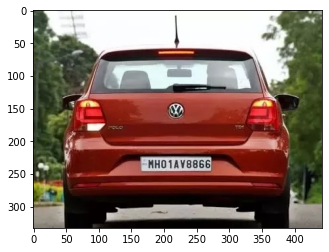

In [4]:

# load the image
image = iio.imread(uri="/content/gdrive/MyDrive/datasets/images/Cars198.png")
fig, ax = plt.subplots()
plt.imshow(image)


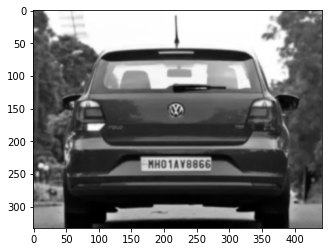

In [5]:
## convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)
fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")

Fearute and target extraction

In [6]:
# Resize the image into 200*200

IMAGE_SIZE = 200

img_dir = "/content/gdrive/MyDrive/datasets/images"
data_path = os.path.join(img_dir,'*g')

files = glob.glob(data_path)
files.sort()

X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [7]:
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text) / (width / IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text) / (height / IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text) / (width / IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text) / (height / IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [8]:
# join the path of image and annotation

path = '/content/gdrive/MyDrive/datasets/annotations'
text_files = ['/content/gdrive/MyDrive/datasets/annotations/'+f for f in sorted(os.listdir(path))]

y=[]
for i in text_files:
    y.append(resizeannotation(i))

Display The Dataset

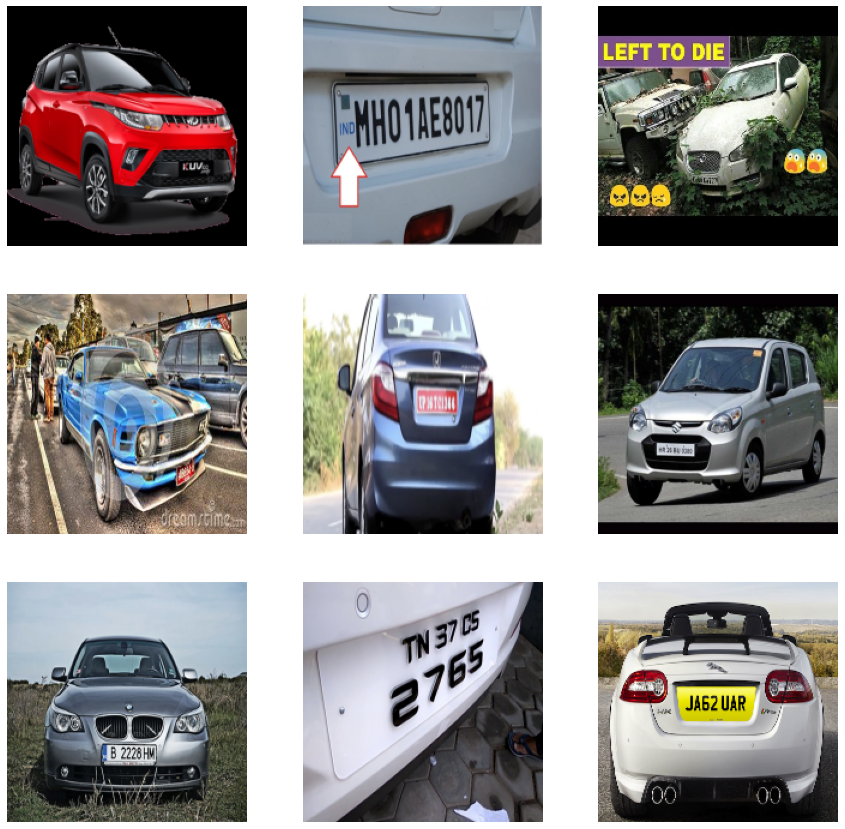

In [11]:
# display the dataset

sample_index = []
for i in range(9):
    sample_index.append(randint(0, len(X)))

plt.figure(figsize=(15, 15))
for index, i in enumerate(sample_index):
    plt.subplot(3, 3, index + 1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))

## Checking size of image Dataset

In [12]:
print(f"X Shape : {np.array(X).shape}")
print(f"y Shape : {np.array(y).shape}")

X Shape : (433, 200, 200, 3)
y Shape : (433, 4)


### sampled Data

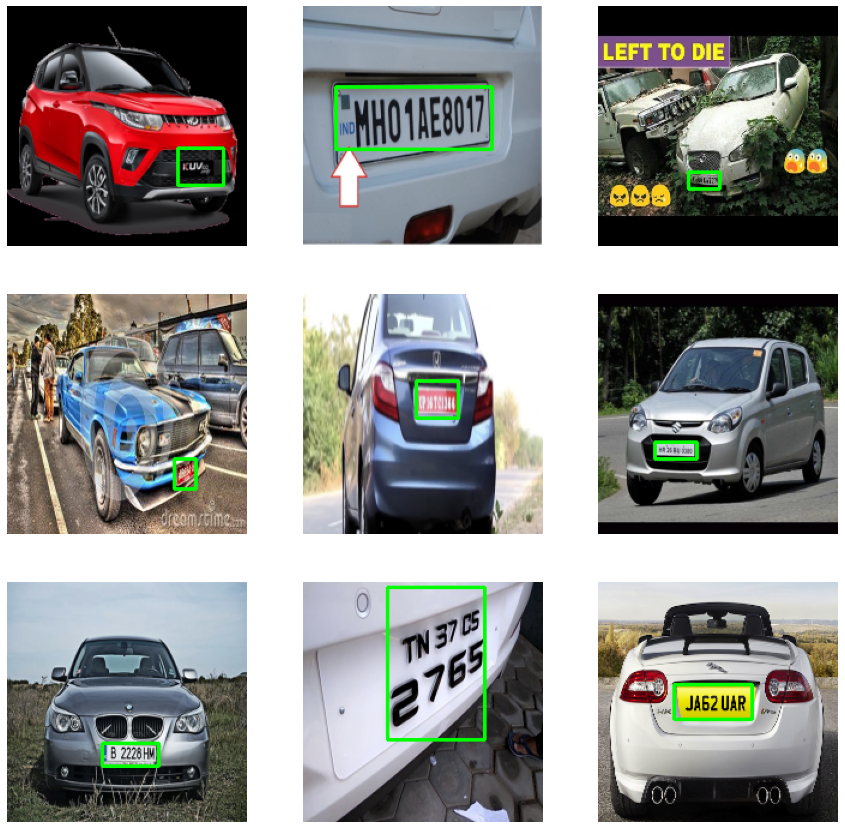

In [14]:
#creating a rectangle over number plate

plt.figure(figsize=(15, 15))
for index, i in enumerate(sample_index):
    plt.subplot(3, 3, index + 1)
    image = cv2.rectangle(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB),(y[i][0],y[i][1]),(y[i][2],y[i][3]),(0, 255, 0), 2)
    plt.imshow(image)
    plt.axis("off")

plt.show()